# Лабораторная работа №2 по численным методам
## Численное решение начальной краевой задачи для дифф. уравнения гиперболического типа
## Син Д.Д. М8О-407Б-18

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def phi0(t):
    return np.sin(2*t)


def phil(t):
    return -np.sin(2*t)


def psi1(x, t=0):
    return 0


def psi2(x, t=0):
    return 2*np.cos(x)


def U(x, t):
    return np.cos(x)*np.sin(2*t)

In [3]:
# Метод прогонки
def equation_solve(a, b, c, d):
    size = len(a)
    p = np.zeros(size)
    q = np.zeros(size)
    p[0] = -c[0] / b[0]
    q[0] = d[0] / b[0]
    for i in range(1, size):
        p[i] = -c[i] / (b[i] + a[i] * p[i - 1])
        q[i] = (d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1])
    x = np.zeros(size)
    x[-1] = q[-1]
    for i in range(size - 2, -1, -1):
        x[i] = p[i] * x[i + 1] + q[i]
    return x

In [4]:
def explicit(n: int, tc: int, t: float, h: float, a, c):
    sigma = a**2 * t**2 / h**2
    print(f'Sigma = {sigma}')
    if sigma > 1:
        raise Exception(f'Явная схема не устойчива sigma = {sigma}')
    u = np.zeros((tc, n))
    u[0] = psi1(h * np.arange(n))
    u[1] = u[0] + t*psi2(h * np.arange(n))
    for k in range(1, tc - 1):
        for j in range(1, n - 1):
            u[k+1][j] = u[k][j+1] * sigma + u[k][j] * (-2*sigma + 2 + c*t**2) + u[k][j-1] * sigma - u[k-1][j]
        u[k+1][0] = phi0((k+1) * t)
        u[k+1][-1] = phil((k+1) * t)
    return u

In [5]:
def implicit(n: int, tc: int, t: float, h: float, ap, cp):
    sigma = ap**2 * t**2 / h**2
    print(f'Sigma = {sigma}')
    u = np.zeros((tc, n))
    u[0] = psi1(h * np.arange(n))
    u[1] = u[0] + t*psi2(h * np.arange(n))
    for k in range(1, tc - 1):
        a = np.full(n, sigma)
        b = np.full(n, -(1 + 2*sigma))
        c = np.full(n, sigma)
        d = np.zeros(n)
        for j in range(1, n - 1):
            d[j] = u[k-1][j] - (cp*t**2 + 2)*u[k][j]
        a[0] = 0
        b[0] = 1
        c[0] = 0
        d[0] = phi0((k+1)*t)
        a[-1] = 0
        b[-1] = 1
        c[-1] = 0
        d[-1] = phil((k+1)*t)
        u[k+1] = equation_solve(a, b, c, d)
    return u

In [6]:
def draw_results(tc, x_max, u, a, n, t_max):
    """
    Построение графиков
    :param tc: количество временных точек
    :param x_max: правая граница
    :param x_min: левая граница
    :param u: сеточная функция
    :param a: коэффициент температуропровдности
    """
    times = np.zeros(tc)
    t = t_max/tc
    for i in range(tc):
        times[i] = t * i
    space = np.zeros(n)
    step = x_max / n
    for i in range(n):
        space[i] = i * step

    times_idx = np.linspace(0, times.shape[0] - 1, 6, dtype=np.int32)
    fig, ax = plt.subplots(3, 2)
    fig.suptitle('Сравнение решений')
    fig.set_figheight(15)
    fig.set_figwidth(16)
    k = 0
    for i in range(3):
        for j in range(2):
            time_idx = times_idx[k]
            ax[i][j].plot(space, u[time_idx], label='Численный метод')
            ax[i][j].plot(space, [U(x, times[time_idx]) for x in space], label='Аналитическое решение')
            ax[i][j].grid(True)
            ax[i][j].set_xlabel('x')
            ax[i][j].set_ylabel('t')
            ax[i][j].set_title(f'Решения при t = {times[time_idx]}')
            k += 1
    plt.legend(bbox_to_anchor=(1.05, 2), loc='upper left', borderaxespad=0.)
    error = np.zeros(tc)
    for i in range(tc):
        error[i] = np.max(np.abs(u[i] - np.array([U(x, times[i]) for x in space])))
    plt.figure(figsize=(12, 7))
    plt.plot(times[2:], error[2:], 'violet', label='Ошибка')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('График изменения ошибки во времени')
    plt.xlabel('t')
    plt.ylabel('error')
    plt.grid(True)
    plt.show()

In [7]:
a = 1
c = -3

n = 65
tc = 300

x_max = np.pi
t_max = 10

h = x_max / n
t = t_max / tc

u = explicit(n=n, tc=tc, t=t, h=h, a=a, c=c)
u

Sigma = 0.47564666765430796


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06666667,  0.06658882,  0.06635544, ..., -0.06596709,
        -0.06635544, -0.06658882],
       [ 0.13293862,  0.13288169,  0.13241599, ..., -0.13164101,
        -0.13241599, -0.13293862],
       ...,
       [ 0.81367374,  0.81276209,  0.80998018, ..., -0.80598297,
        -0.81078973, -0.81367374],
       [ 0.85059233,  0.84963356,  0.8467118 , ..., -0.84257013,
        -0.84758161, -0.85059233],
       [ 0.88373191,  0.88273923,  0.87968149, ..., -0.87540891,
        -0.88059655, -0.88373191]])

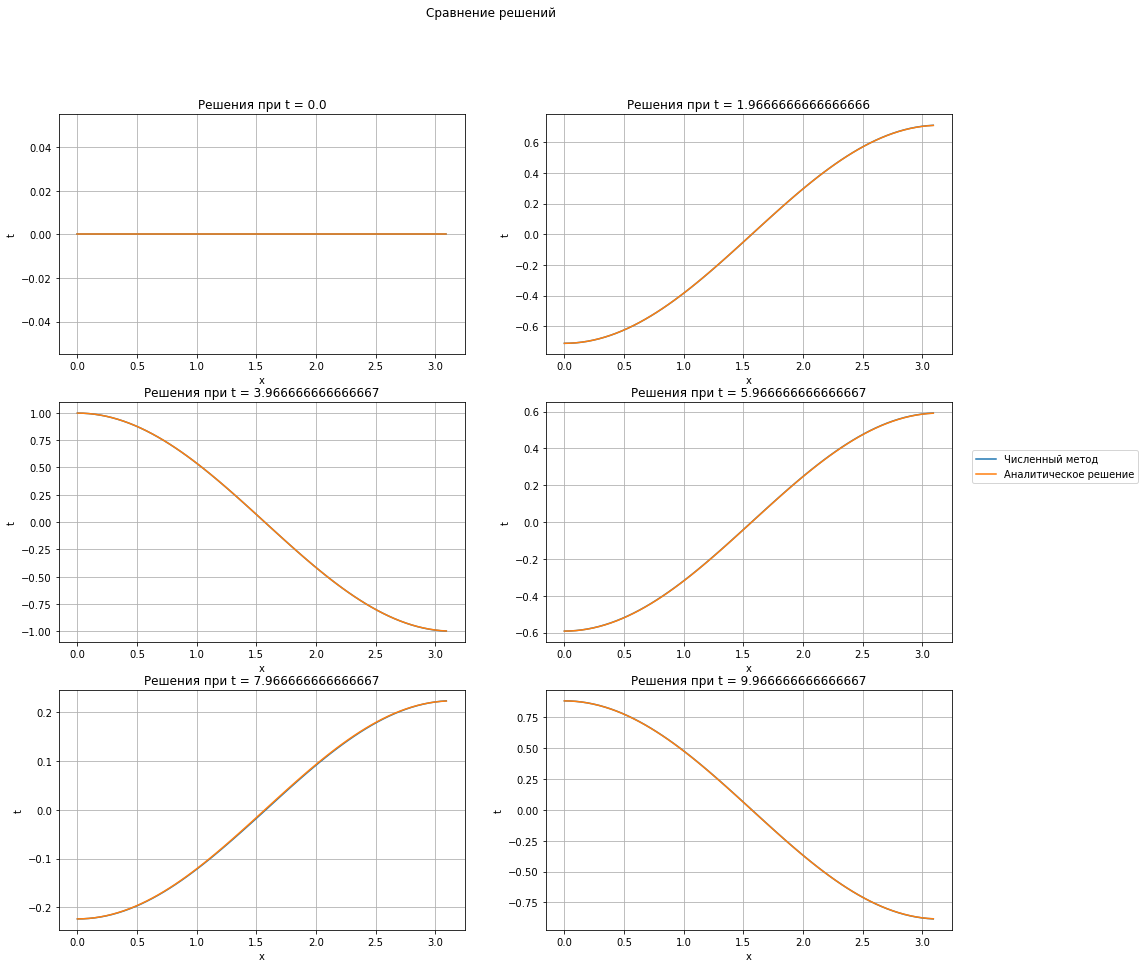

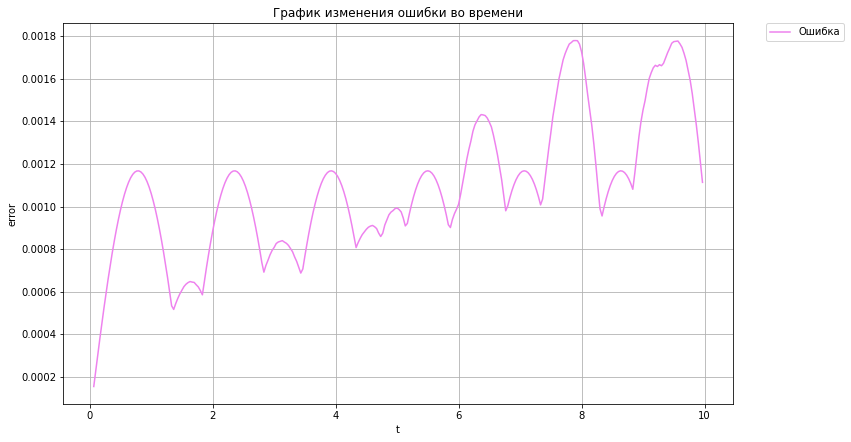

In [8]:
draw_results(tc, x_max, u, a, n, t_max)

In [9]:
a = 1
c = -3

n = 65
tc = 300

x_max = np.pi
t_max = 10

h = x_max / n
t = t_max / tc

u = implicit(n=n, tc=tc, t=t, h=h, ap=a, cp=c)
u

Sigma = 0.47564666765430796


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06666667,  0.06658882,  0.06635544, ..., -0.06596709,
        -0.06635544, -0.06658882],
       [ 0.13293862,  0.13280168,  0.132341  , ..., -0.13157698,
        -0.13237664, -0.13293862],
       ...,
       [ 0.81367374,  0.81150123,  0.80752721, ..., -0.80409351,
        -0.8097823 , -0.81367374],
       [ 0.85059233,  0.84841793,  0.84434802, ..., -0.84078706,
        -0.84663532, -0.85059233],
       [ 0.88373191,  0.88156428,  0.87741554, ..., -0.87374339,
        -0.879726  , -0.88373191]])

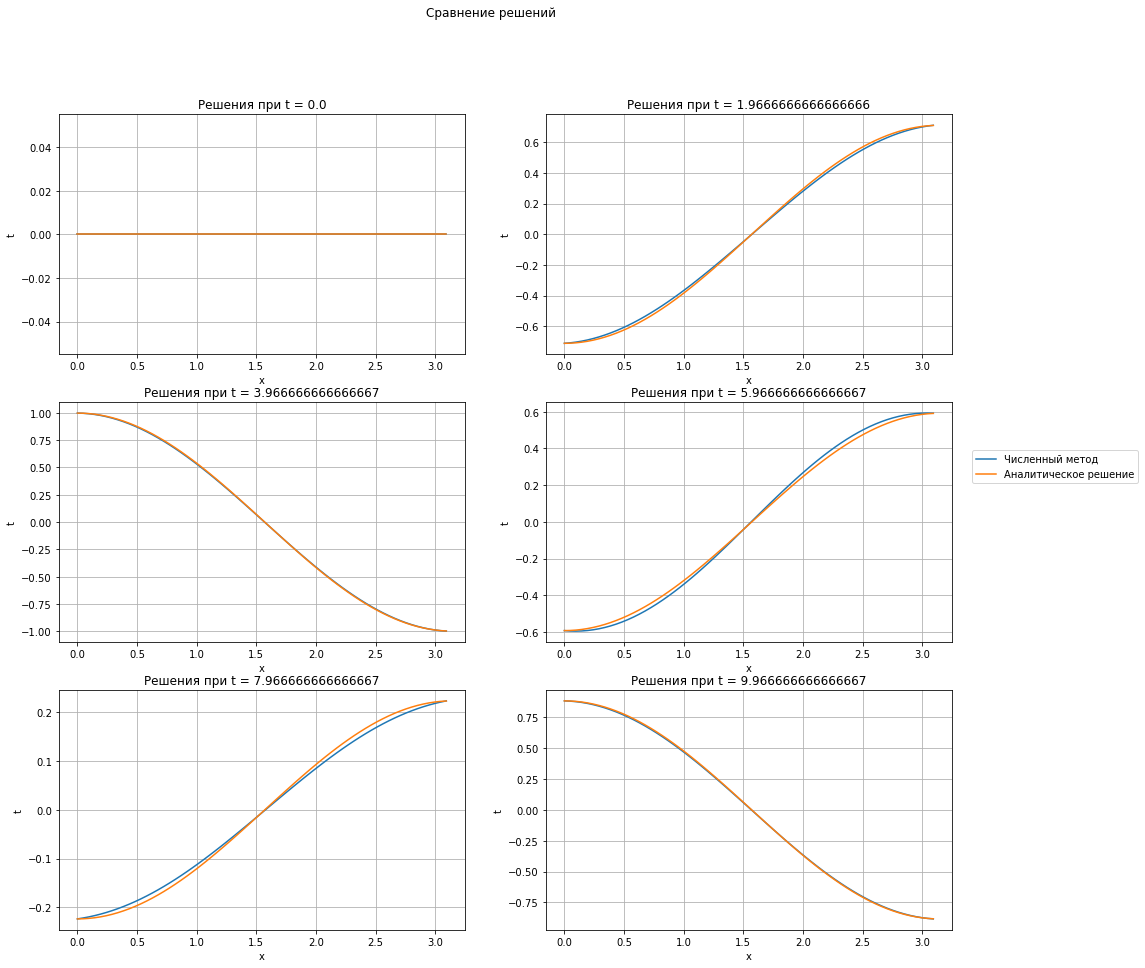

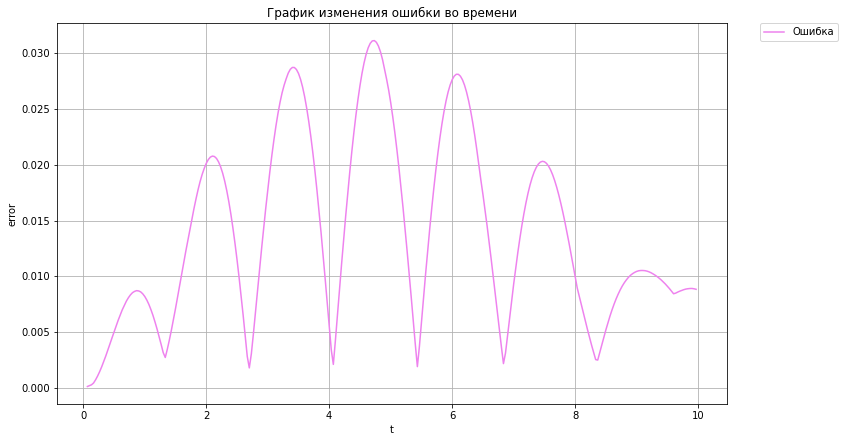

In [10]:
draw_results(tc, x_max, u, a, n, t_max)

In [11]:
8 / 7

1.1428571428571428

In [12]:
24 / 7

3.4285714285714284